In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf

In [3]:

def u_fitting(y_1, y_2, y_3):
    # Fit using a symmetric 'U' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    c = y_2
    a = (y_1 + y_3 - 2*y_2) / 2
    b = y_3 - a - c
    x = -b / (2*a)
    y = a*x**2 + b*x + c
    return x, y, a, b, c

In [15]:
import j_py_sad_correlation as jps

class BOGR(BOG):
    def __init__(self) -> None:
        super().__init__()

    def get_sad(self, frame, reference_sequence, use_jps = True, drift_correct = True):
        ssd = []
        frame = frame.astype(np.int16)
        reference_sequence = reference_sequence.astype(np.int16)
        for i in range(reference_sequence.shape[0]):
            ssd.append(np.sum(np.abs(frame - reference_sequence[i])))
        
        return ssd
    
    def get_phases(self):
        self.phases = []
        self.frame_minimas = []
        for i, sad in enumerate(self.sads):           
            # Get the frame estimate
            frame_minima = np.argmin(sad[2:-2]) + 2

            y_1 = sad[frame_minima - 1]
            y_2 = sad[frame_minima]
            y_3 = sad[frame_minima + 1]
            x_1 = frame_minima - 1
            x_2 = frame_minima
            x_3 = frame_minima + 1

            subframe_minima = u_fitting(y_1, y_2, y_3)[0]

            self.phases.append(frame_minima + subframe_minima - 2)

        self.phases = np.array(self.phases)
        self.has_run["get_phases"] = True

In [18]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"
og = BOGR()
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(bias_correct = False, drift_correct = False)

sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"
og_bc = BOG()
og_bc.logger.set_normal()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run(bias_correct = True, drift_correct = False)

BOG i Loading sequence...
BOG ✓ Sequence loaded with 1107 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 40 frames
BOG i Setting reference period to 35.77851226661945
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.
BOG i Loading sequence...
BOG ✓ Sequence loaded with 1107 frames
BOG i Loading reference sequence...
BOG ✓ Reference sequence loaded with 40 frames
BOG i Setting reference period to 35.77851226661945
BOG i Calculating bias correction...
BOG ✓ Bias correction complete
BOG i Calculating SADs...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.


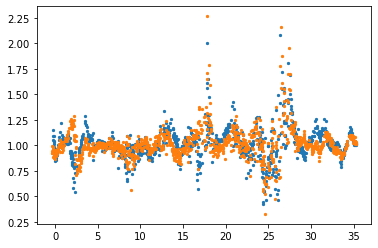

In [19]:
plt.scatter(og.phases[1::], og.delta_phases, s = 5)
plt.scatter(og_bc.phases[1::], og_bc.delta_phases, s = 5)
plt.show()